# Run hacked AlphaFold2 with all models on the designed paired states

### Imports

In [1]:
# %load_ext lab_black
# Python standard library
from glob import glob
import os
import socket
import sys

# 3rd party library imports
import dask
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar

tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /home/broerman/crispy_shifty/projects/OPS/round_1/design
running on node: sofia


Note: We want to use perlmutter

### Run AF2 on the designed paired state X's

In [2]:
sys.path.insert(0, "/global/cfs/cdirs/m4129/projects/crispy_shifty_adam")
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "13_fold_all_states"
# since there is a bug in superfold where initial guess breaks padding, either use the .list or ensure all the state Ys
# in the .pair are the same length
design_list_file = "/pscratch/sd/b/broerman/12_resurface_only_peptide/resurfaced_states.pair"
output_path = os.path.join(f"/pscratch/sd/b/broerman/{simulation_name}")
options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_paired_state_all",
    design_list_file=design_list_file,
    output_path=output_path,
    perlmutter_mode=True,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    time="59:00",
)

/global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


Run the following command with your desired environment active:
sbatch -a 1-810 /pscratch/sd/b/broerman/13_fold_all_states/run.sh


Note: We rsync the perlmutter results, now back on the digs

### Collect scorefiles of the folded paired state Xs and concatenate

In [2]:
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "13_fold_all_states"
output_path = os.path.join("/home/broerman/crispy_shifty/projects/OPS/round_1/design/", simulation_name)

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Load resulting concatenated scorefile

In [3]:
sys.path.insert(0, "/projects/crispy_shifty")
from crispy_shifty.utils.io import parse_scorefile_linear

simulation_name = "13_fold_all_states"
output_path = os.path.join("/home/broerman/crispy_shifty/projects/OPS/round_1/design/", simulation_name)

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

  0%|          | 0/32238 [00:00<?, ?it/s]

### Dump scores_df as a CSV and then reload, for performance reasons

In [13]:
simulation_name = "13_fold_all_states"
output_path = os.path.join("/home/broerman/crispy_shifty/projects/OPS/round_1/design/", simulation_name)

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

In [14]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
):
    display(scores_df)

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_interaction_AB,X_mean_pae_interaction_BA,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_pae_intra_chain_B,X_mean_plddt,X_model,X_model_1_ptm_seed_0__elapsed_time,X_model_1_ptm_seed_0__mean_pae,X_model_1_ptm_seed_0__mean_pae_interaction,X_model_1_ptm_seed_0__mean_pae_intra_chain,X_model_1_ptm_seed_0__mean_pae_intra_chain_A,X_model_1_ptm_seed_0__mean_plddt,X_model_1_ptm_seed_0__model,X_model_1_ptm_seed_0__pTMscore,X_model_1_ptm_seed_0__recycles,X_model_1_ptm_seed_0__rmsd_to_Y,X_model_1_ptm_seed_0__rmsd_to_input,X_model_1_ptm_seed_0__seed,X_model_1_ptm_seed_0__tol,X_model_1_ptm_seed_0__type,X_model_2_ptm_seed_0__elapsed_time,X_model_2_ptm_seed_0__mean_pae,X_model_2_ptm_seed_0__mean_pae_interaction,X_model_2_ptm_seed_0__mean_pae_intra_chain,X_model_2_ptm_seed_0__mean_pae_intra_chain_A,X_model_2_ptm_seed_0__mean_plddt,X_model_2_ptm_seed_0__model,X_model_2_ptm_seed_0__pTMscore,X_model_2_ptm_seed_0__recycles,X_model_2_ptm_seed_0__rmsd_to_Y,X_model_2_ptm_seed_0__rmsd_to_input,X_model_2_ptm_seed_0__seed,X_model_2_ptm_seed_0__tol,X_model_2_ptm_seed_0__type,X_model_3_ptm_seed_0__elapsed_time,X_model_3_ptm_seed_0__mean_pae,X_model_3_ptm_seed_0__mean_pae_interaction,X_model_3_ptm_seed_0__mean_pae_intra_chain,X_model_3_ptm_seed_0__mean_pae_intra_chain_A,X_model_3_ptm_seed_0__mean_plddt,X_model_3_ptm_seed_0__model,X_model_3_ptm_seed_0__pTMscore,X_model_3_ptm_seed_0__recycles,X_model_3_ptm_seed_0__rmsd_to_Y,X_model_3_ptm_seed_0__rmsd_to_input,X_model_3_ptm_seed_0__seed,X_model_3_ptm_seed_0__tol,X_model_3_ptm_seed_0__type,X_model_4_ptm_seed_0__elapsed_time,X_model_4_ptm_seed_0__mean_pae,X_model_4_ptm_seed_0__mean_pae_interaction,X_model_4_ptm_seed_0__mean_pae_intra_chain,X_model_4_ptm_seed_0__mean_pae_intra_chain_A,X_model_4_ptm_seed_0__mean_plddt,X_model_4_ptm_seed_0__model,X_model_4_ptm_seed_0__pTMscore,X_model_4_ptm_seed_0__recycles,X_model_4_ptm_seed_0__rmsd_to_Y,X_model_4_ptm_seed_0__rmsd_to_input,X_model_4_ptm_seed_0__seed,X_model_4_ptm_seed_0__tol,X_model_4_ptm_seed_0__type,X_model_5_ptm_seed_0__elapsed_time,X_model_5_ptm_seed_0__mean_pae,X_model_5_ptm_seed_0__mean_pae_interaction,X_model_5_ptm_seed_0__mean_pae_intra_chain,X_model_5_ptm_seed_0__mean_pae_intra_chain_A,X_model_5_ptm_seed_0__mean_plddt,X_model_5_ptm_seed_0__model,X_model_5_ptm_seed_0__pTMscore,X_model_5_ptm_seed_0__recycles,X_model_5_ptm_seed_0__rmsd_to_Y,X_model_5_ptm_seed_0__rmsd_to_input,X_model_5_ptm_seed_0__seed,X_model_5_ptm_seed_0__tol,X_model_5_ptm_seed_0__type,X_pTMscore,X_recycles,X_rmsd_to_input,X_rmsd_to_reference,X_seed,X_tol,X_type,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_model_1_ptm_seed_0__elapsed_time,Y_model_1_ptm_seed_0__mean_pae,Y_model_1_ptm_seed_0__mean_pae_interaction,Y_model_1_ptm_seed_0__mean_pae_interaction_AB,Y_model_1_ptm_seed_0__mean_pae_interaction_BA,Y_model_1_ptm_seed_0__mean_pae_intra_chain,Y_model_1_ptm_seed_0__mean_pae_intra_chain_A,Y_model_1_ptm_seed_0__mean_pae_intra_chain_B,Y_model_1_ptm_seed_0__mean_plddt,Y_model_1_ptm_seed_0__model,Y_model_1_ptm_seed_0__pTMscore,Y_model_1_ptm_seed_0__recycles,Y_model_1_ptm_seed_0__rmsd_to_X,Y_model_1_ptm_seed_0__rmsd_to_input,Y_model_1_ptm_seed_0__seed,Y_model_1_ptm_seed_0__tol,Y_model_1_ptm_seed_0__type,Y_model_2_ptm_seed_0__elapsed_time,Y_model_2_ptm_seed_0__mean_pae,Y_model_2_ptm_seed_0__mean_pae_interaction,Y_model_2_ptm_seed_0__mean_pae_interaction_AB,Y_model_2_ptm_seed_0__mean_pae_interaction_BA,Y_model_2_ptm_seed_0__mean_pae_intra_chain,Y_model_2_ptm_seed_0__mean_pae_intra_chain_A,Y_model_2_ptm_seed_0__mean_pae_intra_chain_B,Y_model_2_ptm_seed_0__mean_plddt,Y_model_2_ptm_seed_0__model,Y_model_2_ptm_seed_0__pTMscore,Y_model_2_ptm_seed_0__recycles,Y_model_2_ptm_seed_0__rmsd_to_X,Y_model_2_ptm_seed_0__rmsd_to_input,Y_model_2_ptm_seed_0__seed,Y_model_2_ptm_seed_0__tol,Y_model_2_ptm_seed_0__type,Y_model_3_p

2it [00:15,  7.54s/it]


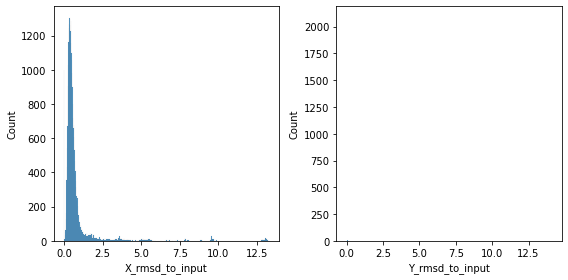

In [6]:
sys.path.insert(0, "/projects/crispy_shifty")
from crispy_shifty.utils.plotting import histplot_df

cols = [
    "X_rmsd_to_input",
    "Y_rmsd_to_input",
]
the_fig = histplot_df(
    df=scores_df,
    cols=cols,
)

2it [00:02,  1.00s/it]


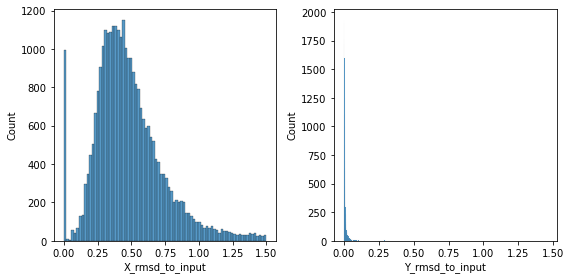

In [7]:
# X rmsd is so much worse than Y's because I haven't filtered on it. I filtered on state Y by model 1 during resurfacing, so naturally
# the best model by rmsd will be model 1 for state Y.

sys.path.insert(0, "/projects/crispy_shifty")
from crispy_shifty.utils.plotting import histplot_df

cols = [
    "X_rmsd_to_input",
    "Y_rmsd_to_input",
]
the_fig = histplot_df(
    df=scores_df.query("X_rmsd_to_input < 1.5 and Y_rmsd_to_input < 1.5"),
    cols=cols,
)

In [15]:
# as long as the alternate state is close to the original state Y, I'm happy
scores_df = scores_df.query("X_rmsd_to_input < 1.5 and Y_rmsd_to_input < 1.5")

In [16]:
len(scores_df)

29586

20it [00:00, 21.09it/s]


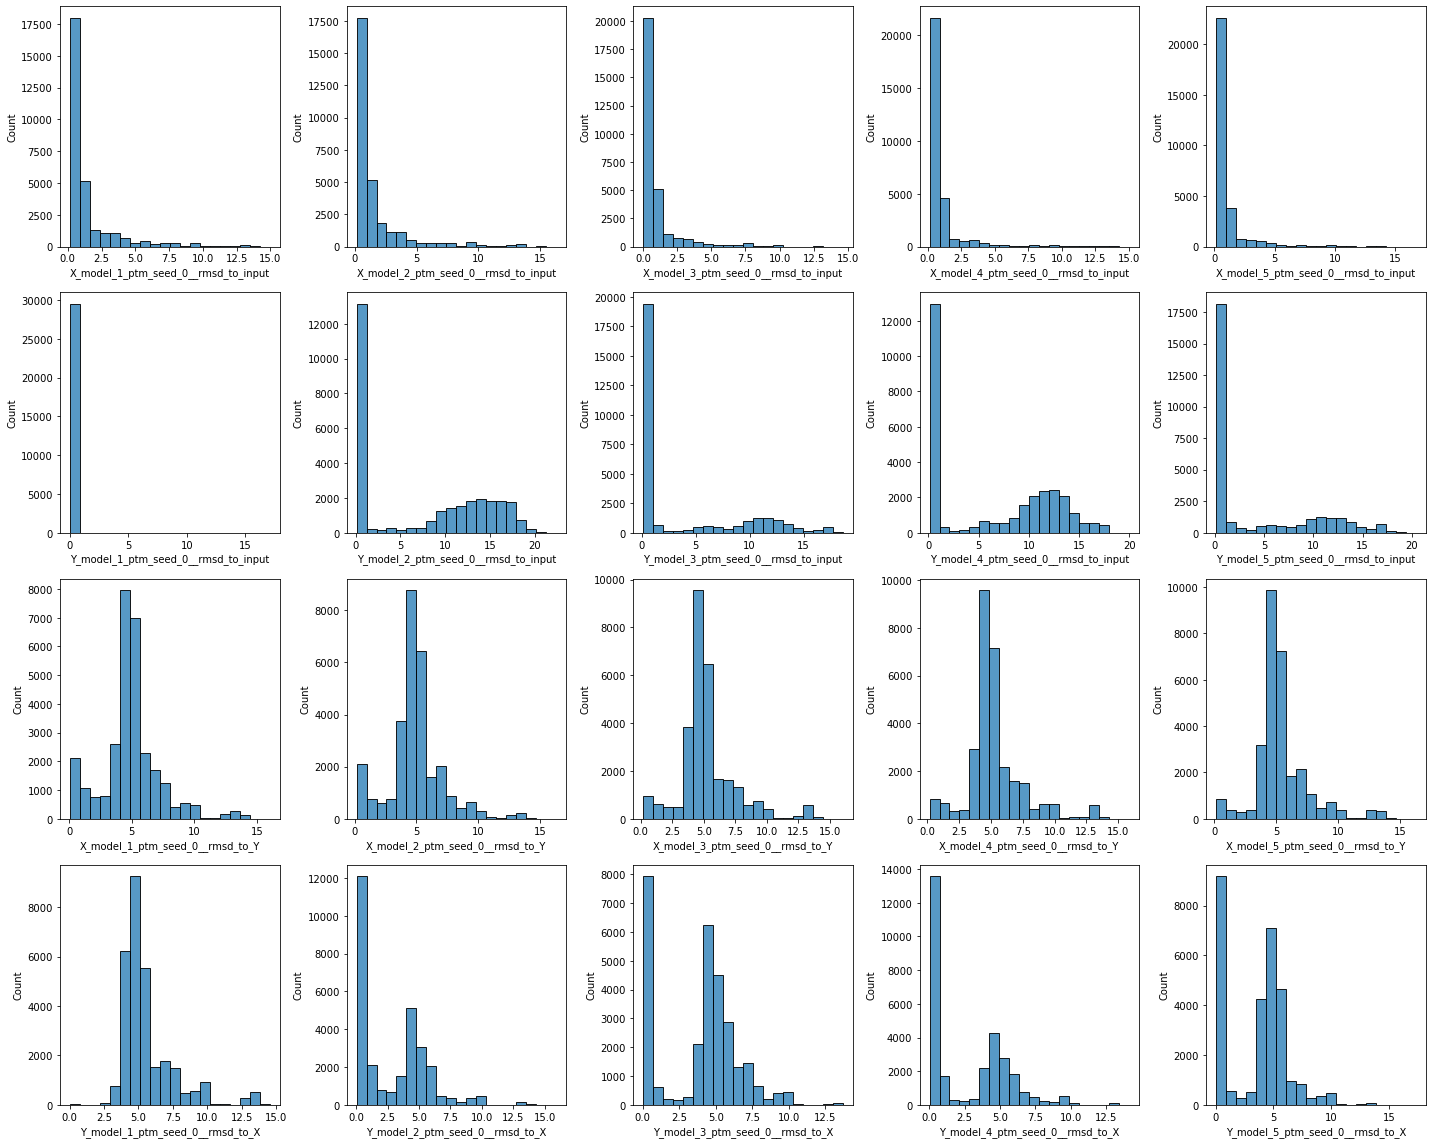

In [10]:
cols = [
    "X_model_1_ptm_seed_0__rmsd_to_input",
    "X_model_2_ptm_seed_0__rmsd_to_input",
    "X_model_3_ptm_seed_0__rmsd_to_input",
    "X_model_4_ptm_seed_0__rmsd_to_input",
    "X_model_5_ptm_seed_0__rmsd_to_input",
    "Y_model_1_ptm_seed_0__rmsd_to_input",
    "Y_model_2_ptm_seed_0__rmsd_to_input",
    "Y_model_3_ptm_seed_0__rmsd_to_input",
    "Y_model_4_ptm_seed_0__rmsd_to_input",
    "Y_model_5_ptm_seed_0__rmsd_to_input",
    "X_model_1_ptm_seed_0__rmsd_to_Y",
    "X_model_2_ptm_seed_0__rmsd_to_Y",
    "X_model_3_ptm_seed_0__rmsd_to_Y",
    "X_model_4_ptm_seed_0__rmsd_to_Y",
    "X_model_5_ptm_seed_0__rmsd_to_Y",
    "Y_model_1_ptm_seed_0__rmsd_to_X",
    "Y_model_2_ptm_seed_0__rmsd_to_X",
    "Y_model_3_ptm_seed_0__rmsd_to_X",
    "Y_model_4_ptm_seed_0__rmsd_to_X",
    "Y_model_5_ptm_seed_0__rmsd_to_X",
]
the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20
)

In [11]:
with pd.option_context(
    'display.max_columns', None,
):
    display(scores_df)

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_interaction_AB,X_mean_pae_interaction_BA,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_pae_intra_chain_B,X_mean_plddt,X_model,X_model_1_ptm_seed_0__elapsed_time,X_model_1_ptm_seed_0__mean_pae,X_model_1_ptm_seed_0__mean_pae_interaction,X_model_1_ptm_seed_0__mean_pae_intra_chain,X_model_1_ptm_seed_0__mean_pae_intra_chain_A,X_model_1_ptm_seed_0__mean_plddt,X_model_1_ptm_seed_0__model,X_model_1_ptm_seed_0__pTMscore,X_model_1_ptm_seed_0__recycles,X_model_1_ptm_seed_0__rmsd_to_Y,X_model_1_ptm_seed_0__rmsd_to_input,X_model_1_ptm_seed_0__seed,X_model_1_ptm_seed_0__tol,X_model_1_ptm_seed_0__type,X_model_2_ptm_seed_0__elapsed_time,X_model_2_ptm_seed_0__mean_pae,X_model_2_ptm_seed_0__mean_pae_interaction,X_model_2_ptm_seed_0__mean_pae_intra_chain,X_model_2_ptm_seed_0__mean_pae_intra_chain_A,X_model_2_ptm_seed_0__mean_plddt,X_model_2_ptm_seed_0__model,X_model_2_ptm_seed_0__pTMscore,X_model_2_ptm_seed_0__recycles,X_model_2_ptm_seed_0__rmsd_to_Y,X_model_2_ptm_seed_0__rmsd_to_input,X_model_2_ptm_seed_0__seed,X_model_2_ptm_seed_0__tol,X_model_2_ptm_seed_0__type,X_model_3_ptm_seed_0__elapsed_time,X_model_3_ptm_seed_0__mean_pae,X_model_3_ptm_seed_0__mean_pae_interaction,X_model_3_ptm_seed_0__mean_pae_intra_chain,X_model_3_ptm_seed_0__mean_pae_intra_chain_A,X_model_3_ptm_seed_0__mean_plddt,X_model_3_ptm_seed_0__model,X_model_3_ptm_seed_0__pTMscore,X_model_3_ptm_seed_0__recycles,X_model_3_ptm_seed_0__rmsd_to_Y,X_model_3_ptm_seed_0__rmsd_to_input,X_model_3_ptm_seed_0__seed,X_model_3_ptm_seed_0__tol,X_model_3_ptm_seed_0__type,X_model_4_ptm_seed_0__elapsed_time,X_model_4_ptm_seed_0__mean_pae,X_model_4_ptm_seed_0__mean_pae_interaction,X_model_4_ptm_seed_0__mean_pae_intra_chain,X_model_4_ptm_seed_0__mean_pae_intra_chain_A,X_model_4_ptm_seed_0__mean_plddt,X_model_4_ptm_seed_0__model,X_model_4_ptm_seed_0__pTMscore,X_model_4_ptm_seed_0__recycles,X_model_4_ptm_seed_0__rmsd_to_Y,X_model_4_ptm_seed_0__rmsd_to_input,X_model_4_ptm_seed_0__seed,X_model_4_ptm_seed_0__tol,X_model_4_ptm_seed_0__type,X_model_5_ptm_seed_0__elapsed_time,X_model_5_ptm_seed_0__mean_pae,X_model_5_ptm_seed_0__mean_pae_interaction,X_model_5_ptm_seed_0__mean_pae_intra_chain,X_model_5_ptm_seed_0__mean_pae_intra_chain_A,X_model_5_ptm_seed_0__mean_plddt,X_model_5_ptm_seed_0__model,X_model_5_ptm_seed_0__pTMscore,X_model_5_ptm_seed_0__recycles,X_model_5_ptm_seed_0__rmsd_to_Y,X_model_5_ptm_seed_0__rmsd_to_input,X_model_5_ptm_seed_0__seed,X_model_5_ptm_seed_0__tol,X_model_5_ptm_seed_0__type,X_pTMscore,X_recycles,X_rmsd_to_input,X_rmsd_to_reference,X_seed,X_tol,X_type,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_model_1_ptm_seed_0__elapsed_time,Y_model_1_ptm_seed_0__mean_pae,Y_model_1_ptm_seed_0__mean_pae_interaction,Y_model_1_ptm_seed_0__mean_pae_interaction_AB,Y_model_1_ptm_seed_0__mean_pae_interaction_BA,Y_model_1_ptm_seed_0__mean_pae_intra_chain,Y_model_1_ptm_seed_0__mean_pae_intra_chain_A,Y_model_1_ptm_seed_0__mean_pae_intra_chain_B,Y_model_1_ptm_seed_0__mean_plddt,Y_model_1_ptm_seed_0__model,Y_model_1_ptm_seed_0__pTMscore,Y_model_1_ptm_seed_0__recycles,Y_model_1_ptm_seed_0__rmsd_to_X,Y_model_1_ptm_seed_0__rmsd_to_input,Y_model_1_ptm_seed_0__seed,Y_model_1_ptm_seed_0__tol,Y_model_1_ptm_seed_0__type,Y_model_2_ptm_seed_0__elapsed_time,Y_model_2_ptm_seed_0__mean_pae,Y_model_2_ptm_seed_0__mean_pae_interaction,Y_model_2_ptm_seed_0__mean_pae_interaction_AB,Y_model_2_ptm_seed_0__mean_pae_interaction_BA,Y_model_2_ptm_seed_0__mean_pae_intra_chain,Y_model_2_ptm_seed_0__mean_pae_intra_chain_A,Y_model_2_ptm_seed_0__mean_pae_intra_chain_B,Y_model_2_ptm_seed_0__mean_plddt,Y_model_2_ptm_seed_0__model,Y_model_2_ptm_seed_0__pTMscore,Y_model_2_ptm_seed_0__recycles,Y_model_2_ptm_seed_0__rmsd_to_X,Y_model_2_ptm_seed_0__rmsd_to_input,Y_model_2_ptm_seed_0__seed,Y_model_2_ptm_seed_0__tol,Y_model_2_ptm_seed_0__type,Y_model_3_p

In [17]:
af2_metrics_to_average = [
    "mean_pae",
    "mean_pae_interaction",
    "mean_pae_interaction_AB",
    "mean_pae_interaction_BA",
    "mean_pae_intra_chain",
    "mean_pae_intra_chain_A",
    "mean_pae_intra_chain_B",
    "mean_plddt",
    "pTMscore",
    # "rmsd_to_input",
    "tol",
]
rmsd_cutoff = 1.5

def collect_model_metrics(row, af2_metrics_to_average, rmsd_cutoff):
    multi_model_info = {
        "X_X_models": [],
        "X_Y_models": [],
        "X_U_models": [],
        "Y_Y_models": [],
        "Y_X_models": [],
        "Y_U_models": [],
    }

    for state, altstate in ["XY", "YX"]:
        for model in "12345":
            if row[f"{state}_model_{model}_ptm_seed_0__rmsd_to_input"] < rmsd_cutoff:
                multi_model_info[f"{state}_{state}_models"].append(model)
            elif row[f"{state}_model_{model}_ptm_seed_0__rmsd_to_{altstate}"] < rmsd_cutoff:
                multi_model_info[f"{state}_{altstate}_models"].append(model)
            else:
                multi_model_info[f"{state}_U_models"].append(model)
    
    for metric in af2_metrics_to_average:
        for state in "XY":
            if f"{state}_model_1_ptm_seed_0__{metric}" not in row:
                # some metrics are not available for X models, for example mean_pae_interaction_AB
                continue
            row[f"{state}_{metric}"] = np.mean([row[f"{state}_model_{model}_ptm_seed_0__{metric}"] for model in multi_model_info[f"{state}_{state}_models"]])

    for k, v in multi_model_info.items():
        row[k] = ",".join(v)
        row[k + "_count"] = len(v)

    return row

scores_df = scores_df.progress_apply(collect_model_metrics, axis=1, af2_metrics_to_average=af2_metrics_to_average, rmsd_cutoff=rmsd_cutoff)

  0%|          | 0/29586 [00:00<?, ?it/s]

In [18]:
with pd.option_context(
    'display.max_columns', None,
):
    display(scores_df)

,X_mean_pae,X_mean_pae_interaction,X_mean_pae_interaction_AB,X_mean_pae_interaction_BA,X_mean_pae_intra_chain,X_mean_pae_intra_chain_A,X_mean_pae_intra_chain_B,X_mean_plddt,X_model,X_model_1_ptm_seed_0__elapsed_time,X_model_1_ptm_seed_0__mean_pae,X_model_1_ptm_seed_0__mean_pae_interaction,X_model_1_ptm_seed_0__mean_pae_intra_chain,X_model_1_ptm_seed_0__mean_pae_intra_chain_A,X_model_1_ptm_seed_0__mean_plddt,X_model_1_ptm_seed_0__model,X_model_1_ptm_seed_0__pTMscore,X_model_1_ptm_seed_0__recycles,X_model_1_ptm_seed_0__rmsd_to_Y,X_model_1_ptm_seed_0__rmsd_to_input,X_model_1_ptm_seed_0__seed,X_model_1_ptm_seed_0__tol,X_model_1_ptm_seed_0__type,X_model_2_ptm_seed_0__elapsed_time,X_model_2_ptm_seed_0__mean_pae,X_model_2_ptm_seed_0__mean_pae_interaction,X_model_2_ptm_seed_0__mean_pae_intra_chain,X_model_2_ptm_seed_0__mean_pae_intra_chain_A,X_model_2_ptm_seed_0__mean_plddt,X_model_2_ptm_seed_0__model,X_model_2_ptm_seed_0__pTMscore,X_model_2_ptm_seed_0__recycles,X_model_2_ptm_seed_0__rmsd_to_Y,X_model_2_ptm_seed_0__rmsd_to_input,X_model_2_ptm_seed_0__seed,X_model_2_ptm_seed_0__tol,X_model_2_ptm_seed_0__type,X_model_3_ptm_seed_0__elapsed_time,X_model_3_ptm_seed_0__mean_pae,X_model_3_ptm_seed_0__mean_pae_interaction,X_model_3_ptm_seed_0__mean_pae_intra_chain,X_model_3_ptm_seed_0__mean_pae_intra_chain_A,X_model_3_ptm_seed_0__mean_plddt,X_model_3_ptm_seed_0__model,X_model_3_ptm_seed_0__pTMscore,X_model_3_ptm_seed_0__recycles,X_model_3_ptm_seed_0__rmsd_to_Y,X_model_3_ptm_seed_0__rmsd_to_input,X_model_3_ptm_seed_0__seed,X_model_3_ptm_seed_0__tol,X_model_3_ptm_seed_0__type,X_model_4_ptm_seed_0__elapsed_time,X_model_4_ptm_seed_0__mean_pae,X_model_4_ptm_seed_0__mean_pae_interaction,X_model_4_ptm_seed_0__mean_pae_intra_chain,X_model_4_ptm_seed_0__mean_pae_intra_chain_A,X_model_4_ptm_seed_0__mean_plddt,X_model_4_ptm_seed_0__model,X_model_4_ptm_seed_0__pTMscore,X_model_4_ptm_seed_0__recycles,X_model_4_ptm_seed_0__rmsd_to_Y,X_model_4_ptm_seed_0__rmsd_to_input,X_model_4_ptm_seed_0__seed,X_model_4_ptm_seed_0__tol,X_model_4_ptm_seed_0__type,X_model_5_ptm_seed_0__elapsed_time,X_model_5_ptm_seed_0__mean_pae,X_model_5_ptm_seed_0__mean_pae_interaction,X_model_5_ptm_seed_0__mean_pae_intra_chain,X_model_5_ptm_seed_0__mean_pae_intra_chain_A,X_model_5_ptm_seed_0__mean_plddt,X_model_5_ptm_seed_0__model,X_model_5_ptm_seed_0__pTMscore,X_model_5_ptm_seed_0__recycles,X_model_5_ptm_seed_0__rmsd_to_Y,X_model_5_ptm_seed_0__rmsd_to_input,X_model_5_ptm_seed_0__seed,X_model_5_ptm_seed_0__tol,X_model_5_ptm_seed_0__type,X_pTMscore,X_recycles,X_rmsd_to_input,X_rmsd_to_reference,X_seed,X_tol,X_type,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_model_1_ptm_seed_0__elapsed_time,Y_model_1_ptm_seed_0__mean_pae,Y_model_1_ptm_seed_0__mean_pae_interaction,Y_model_1_ptm_seed_0__mean_pae_interaction_AB,Y_model_1_ptm_seed_0__mean_pae_interaction_BA,Y_model_1_ptm_seed_0__mean_pae_intra_chain,Y_model_1_ptm_seed_0__mean_pae_intra_chain_A,Y_model_1_ptm_seed_0__mean_pae_intra_chain_B,Y_model_1_ptm_seed_0__mean_plddt,Y_model_1_ptm_seed_0__model,Y_model_1_ptm_seed_0__pTMscore,Y_model_1_ptm_seed_0__recycles,Y_model_1_ptm_seed_0__rmsd_to_X,Y_model_1_ptm_seed_0__rmsd_to_input,Y_model_1_ptm_seed_0__seed,Y_model_1_ptm_seed_0__tol,Y_model_1_ptm_seed_0__type,Y_model_2_ptm_seed_0__elapsed_time,Y_model_2_ptm_seed_0__mean_pae,Y_model_2_ptm_seed_0__mean_pae_interaction,Y_model_2_ptm_seed_0__mean_pae_interaction_AB,Y_model_2_ptm_seed_0__mean_pae_interaction_BA,Y_model_2_ptm_seed_0__mean_pae_intra_chain,Y_model_2_ptm_seed_0__mean_pae_intra_chain_A,Y_model_2_ptm_seed_0__mean_pae_intra_chain_B,Y_model_2_ptm_seed_0__mean_plddt,Y_model_2_ptm_seed_0__model,Y_model_2_ptm_seed_0__pTMscore,Y_model_2_ptm_seed_0__recycles,Y_model_2_ptm_seed_0__rmsd_to_X,Y_model_2_ptm_seed_0__rmsd_to_input,Y_model_2_ptm_seed_0__seed,Y_model_2_ptm_seed_0__tol,Y_model_2_ptm_seed_0__type,Y_model_3_p

In [19]:
# rename indices to point to the correct paths before saving

scores_df.rename(index=lambda x: x.replace("/pscratch/sd/b/broerman","/home/broerman/crispy_shifty/projects/OPS/round_1/design"), inplace=True)

if not os.path.exists(os.path.join(output_path, "scores_mm.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores_mm.csv"))

In [20]:
with open(os.path.join(output_path, "folded_paired_states.list"), "w") as f:
    for path in tqdm(scores_df.index):
        print(path, file=f)

  0%|          | 0/29586 [00:00<?, ?it/s]